## Plots
This notebook contains plots and diagrams for the presentation slides and the report.

- Latex Textwidth: 469.76 pt = 469.76 / 72.27 in = 6.5 in
- Maximum Matplotlib `figsize` = 6.5

In [2]:
import os
import datetime
import numpy as np
import geopandas as gpd
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import IPython
import IPython.display

# use seaborn darkgrid theme
sns.set_theme()

In [3]:
# Use LaTeX font rendering (plotting time significantly increases)

# tex_fonts = {
#     # Use LaTeX to write all text
#     "text.usetex": True,
#     "font.family": "serif",
#     # Use 10pt font in plots, to match 10pt font in document
#     "axes.labelsize": 10,
#     "font.size": 10,
#     # Make the legend/label fonts a little smaller
#     "legend.fontsize": 8,
#     "xtick.labelsize": 8,
#     "ytick.labelsize": 8
# }

# plt.rcParams.update(tex_fonts)

In [4]:
df = pd.read_pickle("..\data\data_prepared.pkl")


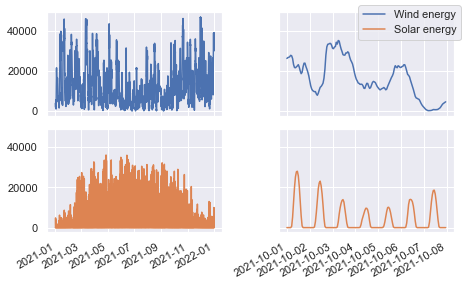

In [5]:
# plot solar and wind
from cProfile import label


df_365 = df.loc["2021-01-01":"2021-12-31"]
df_7   = df.loc["2021-10-01":"2021-10-07"]

fig = plt.figure(figsize=(6.5, 4))
gs = fig.add_gridspec(2, 2, hspace=0.1, wspace=0.1)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='all')

ax1.plot(df_365["prod_wind"], color="C0", label="Wind energy")
ax3.plot(df_365["prod_solar"], color="C1", label="Solar energy")
ax2.plot(df_7["prod_wind"], color="C0")
ax4.plot(df_7["prod_solar"], color="C1")

fig.autofmt_xdate()
fig.legend()

gs.tight_layout(fig)

plt.savefig("../docs/figures/electricity_prod_wind_solar.pdf", format = 'pdf')

## Map of Germany
For visualizing weather stations. [Guide here](https://juanitorduz.github.io/germany_plots/).

In [6]:
# Make sure you read postal codes as strings, otherwise 
# the postal code 01110 will be parsed as the number 1110. 
plz_shape_df = gpd.read_file('../data/gadm41_DEU_0.json', dtype={'plz': str})

In [13]:
# import weather stations

df_dwd = pd.read_pickle("../data/Stations/usable_stations.pkl")
df_dwd_select = pd.read_pickle("../data/Stations/selected_stations.pkl")

df_dwd_select

,Stations_id,von_datum,bis_datum,Stationshoehe,geoBreite,geoLaenge,Stationsname,Bundesland
21,183,19730101,20220909,42,54.6791,13.4344,Arkona,Mecklenburg-Vorpommern
75,701,19490101,20220915,7,53.5332,8.5761,Bremerhaven,Bremen
87,856,19910101,20220915,551,47.8843,12.5404,Chieming,Bayern
98,953,19550101,20220915,481,49.7619,7.0542,Deuselbach,Rheinland-Pfalz
100,963,19940103,20220915,38,52.5881,8.3424,Diepholz,Niedersachsen
141,1346,19520101,20220915,1490,47.8749,8.0038,Feldberg/Schwarzwald,Baden-Württemberg
168,1605,19820101,20220915,35,52.3875,12.1602,Genthin,Sachsen-Anhalt
175,1694,19810101,20220915,59,53.6058,12.1034,Goldberg,Mecklenburg-Vorpommern
207,2115,19520501,20220915,4,54.1750,7.8920,Helgoland,Schleswig-Holstein
322,3231,19790101,20220915,450,50.5611,10.3771,Meiningen,Thüringen


In [14]:
# # Example: All stations fro precipitation

# from wetterdienst import Wetterdienst, Resolution, Period
# from wetterdienst.provider.dwd.observation import DwdObservationRequest
# from wetterdienst.provider.dwd.observation import DwdObservationDataset

# API = Wetterdienst(provider="dwd", network="observation")

# stations = DwdObservationRequest(
#     parameter=DwdObservationDataset.PRECIPITATION,
#     resolution=Resolution.HOURLY,
#     period=Period.HISTORICAL
# )

# df_stations = stations.all().df

# df_stations.head()

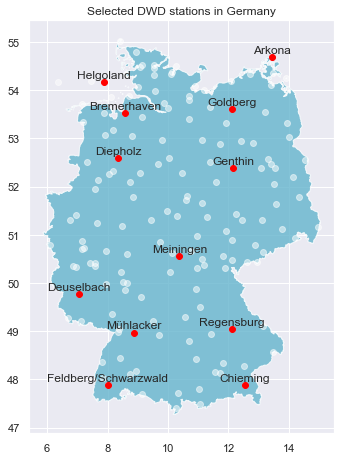

In [25]:
fig, ax = plt.subplots(figsize=(6.5,6.5))

plz_shape_df.plot(ax=ax, color="C9", alpha=0.8)

# Plot all stations. 
for row in df_dwd.iterrows():
    # better code for this?
    row = row[1]
    # Plot station location centroid.
    ax.plot(
        row["geoLaenge"], 
        row["geoBreite"], 
        marker='o',
        c='white',
        alpha=0.5
    )

# Plot selected stations. 
for row in df_dwd_select.iterrows():
    # better code for this?
    row = row[1]
    # Plot station name.
    ax.text(
        x=row["geoLaenge"], 
        # Add small shift to avoid overlap with point.
        y=row["geoBreite"] + 0.08, 
        s=row["Stationsname"], 
        fontsize=12,
        ha='center', 
    )
    # Plot station location centroid.
    ax.plot(
        row["geoLaenge"], 
        row["geoBreite"], 
        marker='o',
        c='red'
    )

ax.set(
    title='Selected DWD stations in Germany',
    # aspect=1.3,
)

fig.tight_layout()
plt.savefig("../docs/figures/selected_dwd_stations.pdf", format = 'pdf')

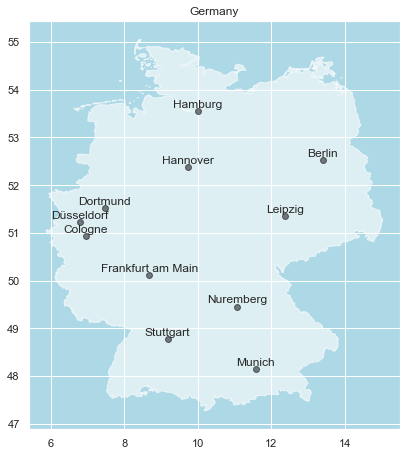

In [118]:
# Get lat and lng of Germany's main cities. 
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Cologne': (6.953101, 50.935173),
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'Munich': (11.576124, 48.137154),
    'Dortmund': (7.468554, 51.513400),
    'Stuttgart': (9.181332, 48.777128),
    'Nuremberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)
}

fig, ax = plt.subplots(figsize=(6.5,6.5))

plz_shape_df.plot(ax=ax, color='white', alpha=0.6)

# Plot cities. 
for c in top_cities.keys():
    # Plot city name.
    ax.text(
        x=top_cities[c][0], 
        # Add small shift to avoid overlap with point.
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )
    # Plot city location centroid.
    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany', 
    aspect=1.3, 
    facecolor='lightblue'
)

fig.tight_layout()